### Problem Summary

The fall and rise of real estate depends on various factors such as the changes in unemployment rate, growth in the population, urbanisation infrastructure development etc. But the local house prices always depend on the supply and demand. For example, if a newly constructed residential complex or a housing development area is opened for the buyers in the market, it drastically reduces the value of all the real estate nearby no matter what even if the area is well sought after for variuos reasons. Even if the properties are in prime locations, since the buyer have more options which is more supply the buyers have the options to explore which reduces the demand. The economic conditions, demography and the market conditions affect the real estate for a greater extent. But on a lower level its always the number of properties available in the region and the atrributes of the house such as number of bedrooms and the the distance from the city center that decides the growth and fall in the prices. 

This project is going to analyse a dataset containing the housing price details in suburb level that are linked with a few of the attributes of the houses such as distance from city centre, council area, No. of properties in the suburb, No. of rooms in the house, etc. to find out the if they are real reason for the fall in real estate.

The dataset was acquired on Kaggle.com, an open source site which can be used to acquire and share data that makes sense. The dataset contains various attributes that are useful of a house starting from the distsnce fron the citycentre, property count in the same region etc. The dataset is compiled using data from many resouces over a period of one year in the suburbs of Melbourne, Australia.

In [2]:
# Import required libraries

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split,StratifiedKFold,cross_val_score,GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

In [3]:
# Reading Dataset

df = pd.read_csv('MELBOURNE_HOUSE_PRICES_LESS.CSV')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,01-04-2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,01-04-2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,01-04-2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,01-04-2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,01-04-2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council


`Suburb`: Suburb

`Address`: Address

`Rooms`: Number of rooms

`Price`: Price in Australian dollars

`Method`:
S - property sold;
SP - property sold prior;
PI - property passed in;
PN - sold prior not disclosed;
SN - sold not disclosed;
NB - no bid;
VB - vendor bid;
W - withdrawn prior to auction;
SA - sold after auction;
SS - sold after auction price not disclosed.
N/A - price or highest bid not available.

`Type`:
br - bedroom(s);
h - house,cottage,villa, semi,terrace;
u - unit, duplex;
t - townhouse;
dev site - development site;
o res - other residential.

`SellerG`: Real Estate Agent

`Date`: Date sold

`Distance`: Distance from CBD in Kilometres

`Regionname`: General Region (West, North West, North, North east …etc)

`Propertycount`: Number of properties that exist in the suburb.

`CouncilArea`: Governing council for the area

`Postcode` : Postal code

In [3]:
df.shape

(63023, 13)

We have 63023 rows and 13 columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63023 entries, 0 to 63022
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         63023 non-null  object 
 1   Address        63023 non-null  object 
 2   Rooms          63023 non-null  int64  
 3   Type           63023 non-null  object 
 4   Price          48433 non-null  float64
 5   Method         63023 non-null  object 
 6   SellerG        63023 non-null  object 
 7   Date           63023 non-null  object 
 8   Postcode       63023 non-null  int64  
 9   Regionname     63023 non-null  object 
 10  Propertycount  63023 non-null  int64  
 11  Distance       63023 non-null  float64
 12  CouncilArea    63023 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 6.3+ MB


We have 8 categorical features and 5 numerical features

In [5]:
df.describe()

,Rooms,Price,Postcode,Propertycount,Distance
count,63023.000000,4.843300e+04,63023.000000,63023.000000,63023.000000
mean,3.110595,9.978982e+05,3125.673897,7617.728131,12.684829
std,0.957551,5.934989e+05,125.626877,4424.423167,7.592015
min,1.000000,8.500000e+04,3000.000000,39.000000,0.000000
25%,3.000000,6.200000e+05,3056.000000,4380.000000,7.000000
50%,3.000000,8.300000e+05,3107.000000,6795.000000,11.400000
75%,4.000000,1.220000e+06,3163.000000,10412.000000,16.700000
max,31.000000,1.120000e+07,3980.000000,21650.000000,64.100000


The minimum, maximum, average and statndard deviation of the numerical variables is shown in the output.

In [6]:
# Checking for null values

df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price            14590
Method               0
SellerG              0
Date                 0
Postcode             0
Regionname           0
Propertycount        0
Distance             0
CouncilArea          0
dtype: int64

In [7]:
# Null value treatment
# As we have null values for the target column we can better drop the rows.

df = df.dropna(axis=0)

In [8]:
df.shape

(48433, 13)

After null value treatment we have 48433 rows

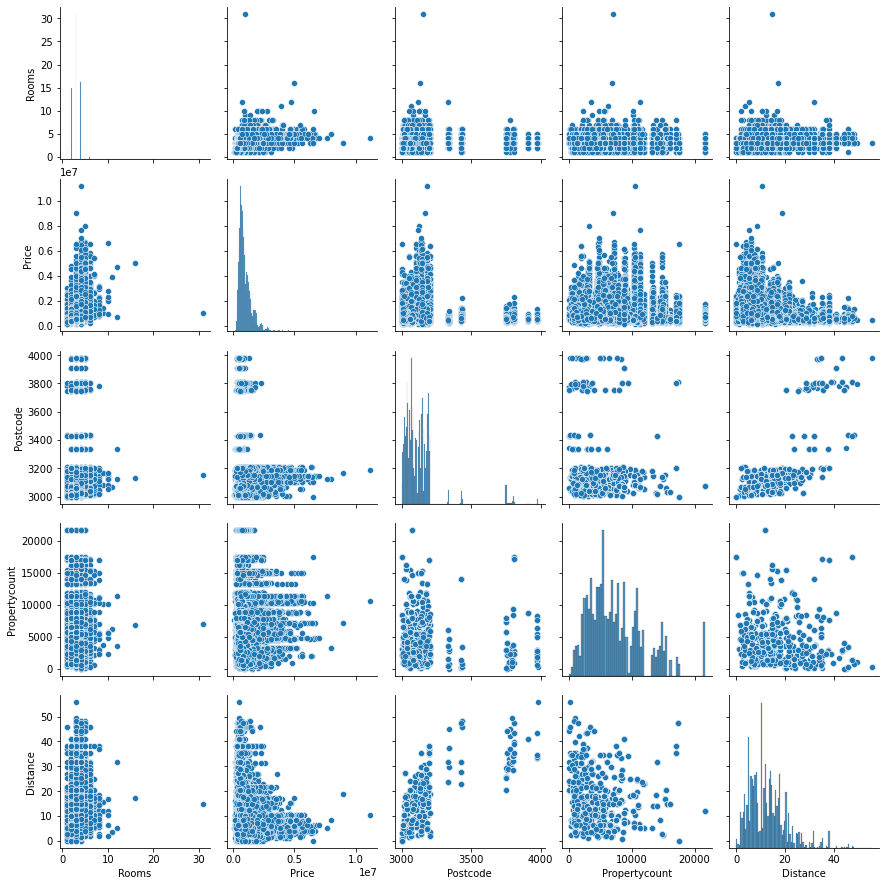

In [9]:
sns.pairplot(df)

It is visible from the scatterplots that the plots of the number of rooms, price, postcode, property count and distance are significantly similar when they are plotted against each other.

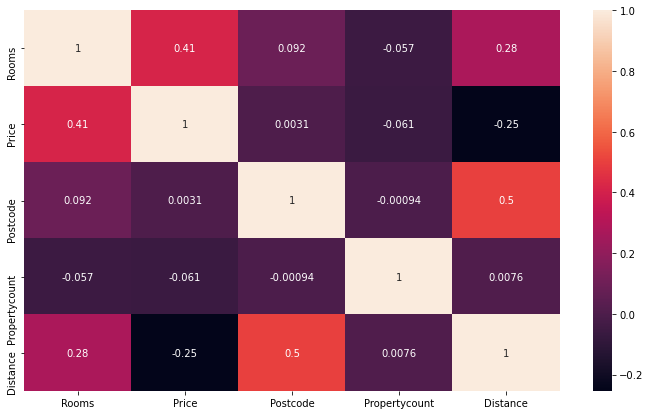

In [10]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [11]:
# Checking for the value counts of each column

for i in df:
    print(i)
    print(df[i].value_counts())
    print('************************************')

Suburb
Reservoir         1067
Bentleigh East     696
Richmond           642
Craigieburn        598
Preston            593
                  ... 
Yarra Junction       1
Wildwood             1
Chintin              1
Warneet              1
Don Valley           1
Name: Suburb, Length: 370, dtype: int64
************************************
Address
14 Northcote St       7
56 Victoria St        7
14 Moray St           7
401/340 Russell St    6
52 Langs Rd           6
                     ..
679 Hampton St        1
3/140 Hoffmans Rd     1
116 Marlborough St    1
2/66 Mahoneys Rd      1
121 Dendy St          1
Name: Address, Length: 44739, dtype: int64
************************************
Rooms
3     21812
4     11576
2     10674
5      2350
1      1670
6       283
7        36
8        19
10        6
12        2
9         2
31        1
16        1
11        1
Name: Rooms, dtype: int64
************************************
Type
h    34161
u     9292
t     4980
Name: Type, dtype: int64
***********

Suburb,Address,SellerG are categorical columns with many categories in it. Surburb column contains the information of which suburb area to which the house belongs to. The address and SellerG columns contain the address and seller name of the houses.

In [12]:
# As we have 14 unique values in Rooms column, grouping them into 5 columns.

l = []
for i in df['Rooms']:
    if i > 4:
        l.append('Greater than 4')
    else:
        l.append(i)
        
df['Rooms'] = l
df['Rooms'].value_counts()

3                 21812
4                 11576
2                 10674
Greater than 4     2701
1                  1670
Name: Rooms, dtype: int64

From the output, the number of houses with 1, 2, 3, 4, greater than 4 bedrooms is visible.

In [13]:
# As there are many unique values in property count, grouped them as per below and converted to categorical column.

p = []
for i in df['Propertycount']:
    if i < 1000:
        p.append('Less than 1000')
    elif 1000 <= i < 10000:
        p.append('Between 1000 and 10000')
    elif i >= 10000:
        p.append('Greater than 10000')
        
df['Propertycount'] = p
df['Propertycount'].value_counts()

Between 1000 and 10000    34539
Greater than 10000        13200
Less than 1000              694
Name: Propertycount, dtype: int64

From the output, the number of houses with property count less than 1000, between 1000 and 10,000 and greater than 10,000 in the suburb is visible.

In [14]:
# Checking whether each Regionname has unique councilareas or not.

for i in df['Regionname'].unique():
    print(i,'\n',df[df['Regionname'] == i]['CouncilArea'].unique())
    print('***********************************')

Northern Metropolitan 
 ['Yarra City Council' 'Darebin City Council' 'Hume City Council'
 'Moreland City Council' 'Banyule City Council' 'Melbourne City Council'
 'Whittlesea City Council']
***********************************
Western Metropolitan 
 ['Moonee Valley City Council' 'Brimbank City Council'
 'Hobsons Bay City Council' 'Maribyrnong City Council'
 'Melton City Council' 'Hume City Council' 'Moreland City Council'
 'Wyndham City Council']
***********************************
Southern Metropolitan 
 ['Port Phillip City Council' 'Stonnington City Council'
 'Boroondara City Council' 'Monash City Council' 'Bayside City Council'
 'Glen Eira City Council' 'Kingston City Council' 'Melbourne City Council']
***********************************
South-Eastern Metropolitan 
 ['Kingston City Council' 'Frankston City Council' 'Monash City Council'
 'Casey City Council' 'Greater Dandenong City Council' 'Knox City Council']
***********************************
Eastern Metropolitan 
 ['Maroondah Ci

Found that maximum records are unique values and hence we can conclude that the columns Councilarea and Regionname as highly correlated. So dropping CouncilArea column. As Suburb and Address have many categories among them and they just denote the location of the house, they will definitely be correlated with Regionname column and hence dropping those two columns. Also SellerG column have many unique sellers in it, it is not possible to encode with those many categories, hence the seller information column is dropped. Postcode also denotes the location and so dropping it. Date column represents date of selling and it definitely doesn't effect price column, hence the date colum is being dropped.

In [15]:
df = df.drop(['Suburb','Address','SellerG','CouncilArea','Postcode','Date'],axis=1)
df.head()

,Rooms,Type,Price,Method,Regionname,Propertycount,Distance
0,3,h,1490000.0,S,Northern Metropolitan,Between 1000 and 10000,3.0
1,3,h,1220000.0,S,Northern Metropolitan,Between 1000 and 10000,3.0
2,3,h,1420000.0,S,Northern Metropolitan,Between 1000 and 10000,3.0
3,3,h,1515000.0,S,Western Metropolitan,Between 1000 and 10000,7.5
4,2,h,670000.0,S,Western Metropolitan,Between 1000 and 10000,10.4


In [16]:
# Dividing the data into categorical and numerical for further processes.

df_cat = df.select_dtypes(include='object')
df_num = df.select_dtypes(include=np.number)

In [17]:
df_num.head()

,Price,Distance
0,1490000.0,3.0
1,1220000.0,3.0
2,1420000.0,3.0
3,1515000.0,7.5
4,670000.0,10.4


In [18]:
df_cat.head()

,Rooms,Type,Method,Regionname,Propertycount
0,3,h,S,Northern Metropolitan,Between 1000 and 10000
1,3,h,S,Northern Metropolitan,Between 1000 and 10000
2,3,h,S,Northern Metropolitan,Between 1000 and 10000
3,3,h,S,Western Metropolitan,Between 1000 and 10000
4,2,h,S,Western Metropolitan,Between 1000 and 10000


In [19]:
# Outlier Detection using IQR method

q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
IQR = q3-q1

# Removal of outliers

df = df[~((df>(q3+1.5*IQR)) | (df<(q1-1.5*IQR))).any(axis=1)]
df.shape

(44644, 7)

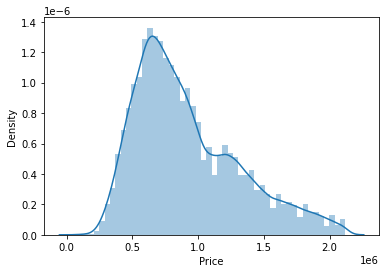

0.8485550369906724


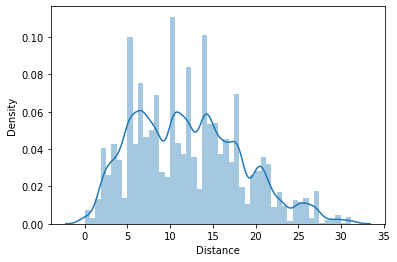

0.42867563651649637


In [20]:
# Checking the distribution of numerical columns.

for i in df_num:
    sns.distplot(df[i])
    plt.show()
    print(df[i].skew())

In [21]:
# Performing log transformation to reduce skewness

df['Distance'] = np.sqrt(df['Distance'])

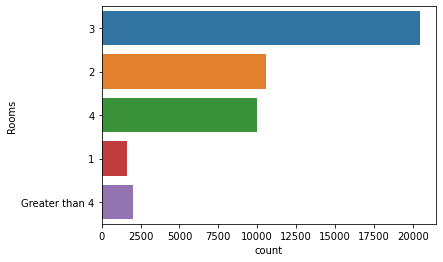

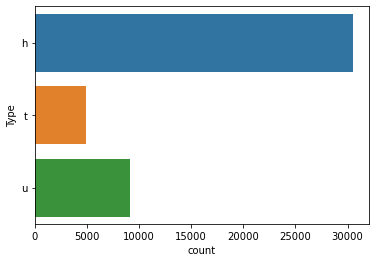

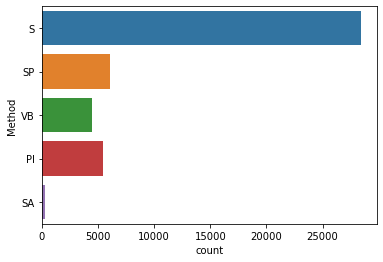

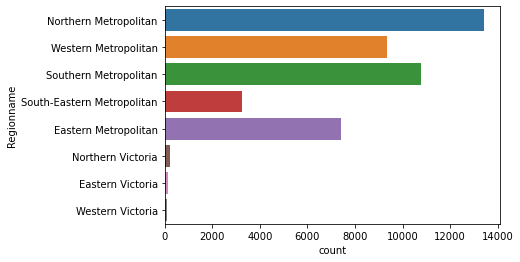

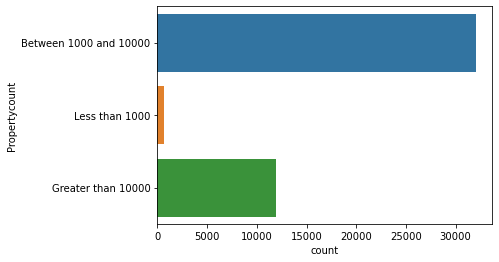

In [22]:
# Countplots of categorical columns to check the variance of each category

for i in df_cat:
    sns.countplot(y = df[i])
    plt.show()

### One Hot Encoding

OneHotEncoder can use the encoder on training data and also apply it to transform both training and test data. get_dummies command from the Pandas library cannot do this process.

In [23]:
df = pd.get_dummies(df,drop_first=True)
df.head()

,Price,Distance,Rooms_2,Rooms_3,Rooms_4,Rooms_Greater than 4,Type_t,Type_u,Method_S,Method_SA,...,Method_VB,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria,Propertycount_Greater than 10000,Propertycount_Less than 1000
0,1490000.0,1.732051,0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,1220000.0,1.732051,0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
2,1420000.0,1.732051,0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
3,1515000.0,2.738613,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,670000.0,3.224903,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


### Scaling

Scaling is needed since there are different scales, the performance of the models will be affected when the input numerical variables contain different scales.

In [24]:
# Scaling the data using Standard Scaler

ss = StandardScaler()

df_scaled = pd.DataFrame(ss.fit_transform(df),columns=df.columns)
df_scaled.head()

,Price,Distance,Rooms_2,Rooms_3,Rooms_4,Rooms_Greater than 4,Type_t,Type_u,Method_S,Method_SA,...,Method_VB,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria,Propertycount_Greater than 10000,Propertycount_Less than 1000
0,1.439004,-1.684025,-0.555754,1.086469,-0.536743,-0.21594,-0.350884,-0.509091,0.756069,-0.084431,...,-0.331364,-0.058256,1.526809,-0.068417,-0.280157,-0.564623,-0.514109,-0.049925,-0.604022,-0.119254
1,0.761736,-1.684025,-0.555754,1.086469,-0.536743,-0.21594,-0.350884,-0.509091,0.756069,-0.084431,...,-0.331364,-0.058256,1.526809,-0.068417,-0.280157,-0.564623,-0.514109,-0.049925,-0.604022,-0.119254
2,1.263416,-1.684025,-0.555754,1.086469,-0.536743,-0.21594,-0.350884,-0.509091,0.756069,-0.084431,...,-0.331364,-0.058256,1.526809,-0.068417,-0.280157,-0.564623,-0.514109,-0.049925,-0.604022,-0.119254
3,1.501714,-0.635026,-0.555754,1.086469,-0.536743,-0.21594,-0.350884,-0.509091,0.756069,-0.084431,...,-0.331364,-0.058256,-0.654961,-0.068417,-0.280157,-0.564623,1.945111,-0.049925,-0.604022,-0.119254
4,-0.617883,-0.128234,1.799357,-0.920413,-0.536743,-0.21594,-0.350884,-0.509091,0.756069,-0.084431,...,-0.331364,-0.058256,-0.654961,-0.068417,-0.280157,-0.564623,1.945111,-0.049925,-0.604022,-0.119254


### Splitting the data into train and test sets

In [25]:
X = df.drop('Price',axis=1)
y = df['Price']

In [26]:
# Splitting the data

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=34)

### Baseline method

We'll use a simple baseline: for all test instances, predict the median value seen in the training data:

In [27]:
med_price = y_train.median()
med_price

820000.0

In [28]:
y_pred = np.full((y_train.shape[0],1),med_price)

baseline_mse = mean_squared_error(y_train, y_pred)
baseline_rmse = np.sqrt(baseline_mse)
baseline_rmse

410176.90309563436

## Model Building

### Linear Regression

In [29]:
lr = LinearRegression()

lr.fit(X_train,y_train)

LinearRegression()

In [30]:
lr.score(X_train,y_train)

0.582565967394963

In [31]:
y_pred = lr.predict(X_train)

In [32]:
lr_rmse = np.sqrt(mean_squared_error(y_pred,y_train))
lr_rmse

257737.37201979538

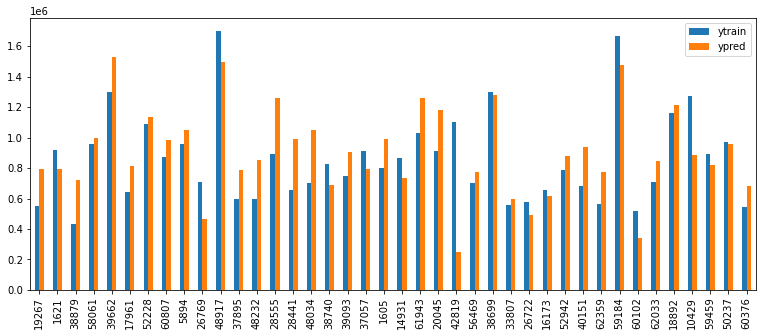

In [33]:
df1 = pd.DataFrame({"ytrain": y_train[:40], "ypred": y_pred[:40]})

df1.plot(kind='bar',figsize=(13,5))
plt.show()

### Decision Trees

In [34]:
dt = DecisionTreeRegressor(random_state=43)

dt.fit(X_train,y_train)

DecisionTreeRegressor(random_state=43)

In [35]:
dt.score(X_train,y_train)

0.7926309809068894

In [36]:
y_pred = dt.predict(X_train)

In [37]:
dt_rmse = np.sqrt(mean_squared_error(y_pred,y_train))
dt_rmse

181658.3670638669

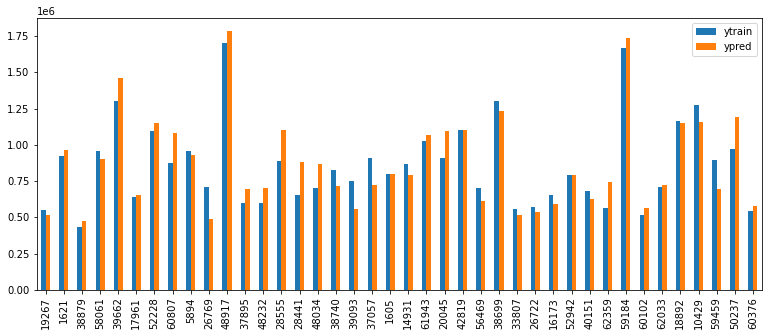

In [38]:
df1 = pd.DataFrame({"ytrain": y_train[:40], "ypred": y_pred[:40]})

df1.plot(kind='bar',figsize=(13,5))
plt.show()

### Random Forest Regressor

In [39]:
rf = RandomForestRegressor(random_state=34)

rf.fit(X_train,y_train)

RandomForestRegressor(random_state=34)

In [40]:
rf.score(X_train,y_train)

0.7900207832166233

In [41]:
y_pred = rf.predict(X_train)

In [42]:
rf_rmse = np.sqrt(mean_squared_error(y_pred,y_train))
rf_rmse

182798.0779720877

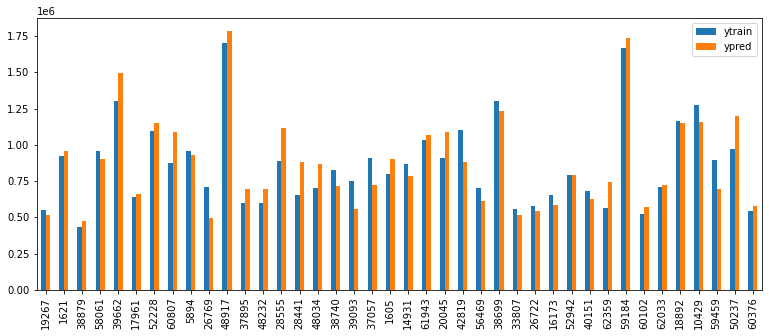

In [43]:
df1 = pd.DataFrame({"ytrain": y_train[:40], "ypred": y_pred[:40]})

df1.plot(kind='bar',figsize=(13,5))
plt.show()

## Cross-Validation

The validation or evaluation cannot be done on the training data since overfitting might happen with the best models. Hence a validation set opposed to test-set is created by splitting the training data.

In [44]:
# Linear Regressor

scores = cross_val_score(lr, X_train, y_train, scoring="neg_mean_squared_error", cv=5)

scores = np.sqrt(-scores)

print("Scores:",scores)
print("Mean:", scores.mean())
print("Standard deviation:", scores.std())

Scores: [257470.53659451 256325.25032156 256723.55283233 262598.97390228
 256473.35791974]
Mean: 257918.334314085
Standard deviation: 2373.2798372234993


In [45]:
# Decision Tree Regressor

scores = cross_val_score(dt, X_train, y_train, scoring="neg_mean_squared_error", cv=5)

scores = np.sqrt(-scores)

print("Scores:",scores)
print("Mean:", scores.mean())
print("Standard deviation:", scores.std())

Scores: [214895.09007011 216569.71031494 210444.83619811 217526.20240989
 210985.36043163]
Mean: 214084.23988493704
Standard deviation: 2882.029158985061


In [46]:
# Random Forest Regressor

rf = RandomForestRegressor(n_estimators=5, random_state=34)
scores = cross_val_score(rf, X_train, y_train, scoring="neg_mean_squared_error", cv=5)

scores = np.sqrt(-scores)

print("Scores:",scores)
print("Mean:", scores.mean())
print("Standard deviation:", scores.std())

Scores: [213385.43792466 212730.76962296 207864.23160003 214183.92693721
 209470.39208875]
Mean: 211526.95163472212
Standard deviation: 2433.418254856725


## Hyperparameters tuning using GridSearchCV


In the previous experiment, we used 5 decision trees in the Random Forest algorithm. This setting is called a hyperparameter of the algorithm, and needs to be set before a model is trained.

We might experiment with several different settings of the hyperparameter to find its optimal settings. However, many algorithms have quite a few of such hyperparameters. Scikit-learn has a utility to automatically search for the best combination of hyperparameter values, implemented in the `GridSearchCV` class. 

`GridSearchCV` takes a set of hyperparameters and the search range for each hyperparameter, constructs a search grid with all possible hyperparameter combinations, and evaluates each combination using cross-validation. The output is the model with the best cross-validation accuracy.

In [462]:
rf = RandomForestRegressor(random_state=34)

params = [{'n_estimators':np.arange(1,50,2),'max_depth':np.arange(1,32,2)}]
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

gsearch = GridSearchCV(estimator=rf,param_grid=params,cv = kfold,scoring='neg_mean_squared_error',return_train_score=True)

In [463]:
gsearch.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=RandomForestRegressor(random_state=34),
             param_grid=[{'max_depth': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31]),
                          'n_estimators': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49])}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [465]:
gsearch.best_estimator_

RandomForestRegressor(max_depth=13, n_estimators=35, random_state=34)

The best model proved to be one with max_depth=13, n_estimators=35, random_state=34

### Feature Importances

In [484]:
# Percantage of importance of each feature

pd.DataFrame(gsearch.best_estimator_.feature_importances_*100,index=X_train.columns,columns = ['Feature importance']).sort_values(by = 'Feature importance',ascending=False)

,Feature importance
Distance,26.493669
Regionname_Southern Metropolitan,23.904142
Type_u,17.890089
Regionname_Western Metropolitan,6.580871
Rooms_2,4.484446
Type_t,4.440135
Regionname_Northern Metropolitan,3.709901
Rooms_3,3.258395
Rooms_4,3.022842
Rooms_Greater than 4,1.815154


As we have very less number of columns, hence not neglecting any column. Building the model with all above features.

### Building Final model with best parameters

In [47]:
rf_final = RandomForestRegressor(max_depth=13, n_estimators=35, random_state=34)

rf_final.fit(X_train,y_train)

RandomForestRegressor(max_depth=13, n_estimators=35, random_state=34)

In [48]:
rf_final.score(X_train,y_train)

0.7762821698719707

In [49]:
scores = cross_val_score(rf_final, X_train, y_train, scoring="neg_mean_squared_error", cv=5)

scores = np.sqrt(-scores)

print("Scores:",scores)
print("Mean:", scores.mean())
print("Standard deviation:", scores.std())

Scores: [207875.19460608 205529.31563319 204088.5548002  208562.71369722
 204514.70035401]
Mean: 206114.09581813947
Standard deviation: 1794.438552269562


In [50]:
y_pred = rf_final.predict(X_train)

In [51]:
rf_rmse = np.sqrt(mean_squared_error(y_pred,y_train))
rf_rmse

188683.43259949234

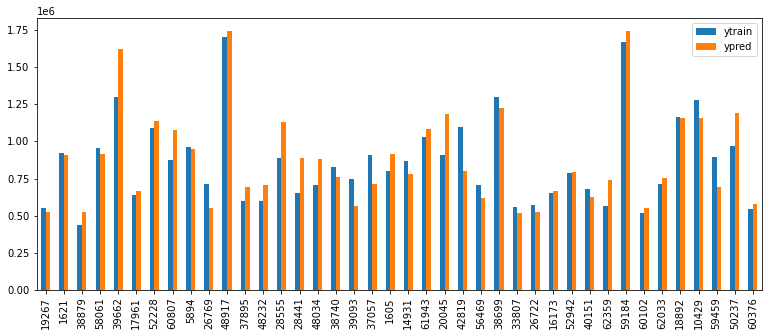

In [52]:
df1 = pd.DataFrame({"ytrain": y_train[:40], "ypred": y_pred[:40]})

df1.plot(kind='bar',figsize=(13,5))
plt.show()

Model is performing good as we can see the above bar graphs of training and predicted values.
Also we can observe there is no much change even after tuning the hyperparameters. And so we can confirm the above Random Forest model as a final model.

### Evaluating on test set

In [53]:
y_pred = rf_final.predict(X_test)

In [54]:
final_mse = mean_squared_error(y_test, y_pred)
final_rmse = np.sqrt(final_mse)
final_rmse

206951.07261035618

Visualization the predictions on the test set:

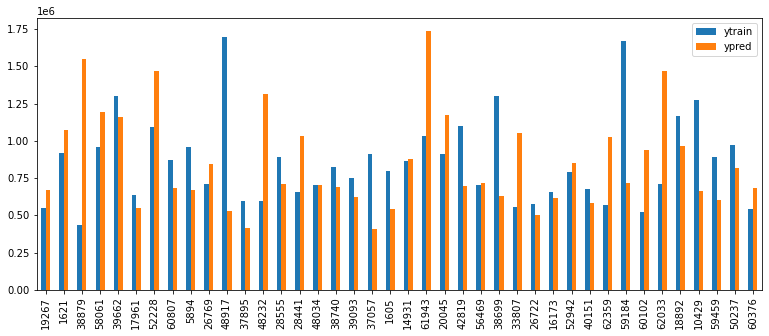

In [55]:
df1 = pd.DataFrame({"ytrain": y_train[:40], "ypred": y_pred[:40]})

df1.plot(kind='bar',figsize=(13,5))
plt.show()

### WORD COUNT:

In [4]:
%%javascript
var nb = IPython.notebook;
var kernel = IPython.notebook.kernel;
var command = "NOTEBOOK_FULL_PATH = '" + nb.notebook_path + "'";
kernel.execute(command);

<IPython.core.display.Javascript object>

In [5]:
import io
from IPython.nbformat import current

with io.open(NOTEBOOK_FULL_PATH.split("/")[-1], 'r', encoding='utf-8') as f:
    nb = current.read(f, 'json')

word_count = 0
for cell in nb.worksheets[0].cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))
print(f"Word count: {word_count}")

Word count: 987
